In [ ]:
import time
import random
import numpy as np
import pandas as pd
## TODO: TP should be HERE

np.random.seed(42)
## TODO: Data Generation

# Reset performance metrics
def reset_comparisons_and_swaps_counts():
    global comparisons, swaps
    comparisons = 0
    swaps = 0

## TODO: Sort Algorithms implementations

# Selection Sort
def selection_sort(array):
    global comparisons, swaps
    reset_comparisons_and_swaps_counts()
    n = len(array)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            comparisons += 1
            if array[j] < array[min_idx]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
        swaps += 2
    return array

# Bubble Sort
def bubble_sort(array):
    global comparisons, swaps
    reset_comparisons_and_swaps_counts()
    n = len(array)
    for i in range(n):
        for j in range(0, n - i - 1):
            comparisons += 1
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                swaps += 2
    return array

# Insertion Sort by Exchanges
def insertion_sort_exchanges(array):
    global comparisons, swaps
    reset_comparisons_and_swaps_counts()
    n = len(array)
    for i in range(1, n):
        for j in range(i, 0, -1):
            comparisons += 1
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]
                swaps += 2
            else:
                break
    return array

# Insertion Sort by Shifting
def insertion_sort_shifting(array):
    global comparisons, swaps
    reset_comparisons_and_swaps_counts()
    n = len(array)
    for i in range(1, n):
        key = array[i]
        j = i - 1
        while j >= 0 and array[j] > key:
            comparisons += 1
            array[j + 1] = array[j]
            swaps += 1
            j -= 1
        array[j + 1] = key
        swaps += 1
    return array


## TODO: measure_performance

def measure_performance(algorithme, array):
    start_time = time.time()
    copy_array = array[:]
    sorted_array = algorithme(copy_array)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    return execution_time, comparisons, swaps


## TODO: make Benchmarks

def analyze_algorithms():
    data = []
    array_sizes = [1000, 5000, 10000]
    tests = 5
    for size in array_sizes:
        random_array = random.sample(range(size * 10), size)
        ascending_array = sorted(random_array)
        descending_arr = sorted(random_array, reverse=True)

        for array_type, arr in [('Random', random_array), ('Ascending', ascending_array), ('Descending', descending_arr)]:
            for algo_name, algo_function in [
                ('Selection Sort', selection_sort),
                ('Bubble Sort', bubble_sort),
                ('Insertion Sort (Exchanges)', insertion_sort_exchanges),
                ('Insertion Sort (Shifting)', insertion_sort_shifting)
            ]:
                comparisons_list = []
                swaps_list = []
                time_list = []
                
                for _ in range(tests):
                    exec_time, comparisons, swaps = measure_performance(algo_function, arr)
                    comparisons_list.append(comparisons)
                    swaps_list.append(swaps)
                    time_list.append(exec_time)

                Avg_comparisons = np.mean(comparisons_list)
                Avg_swaps = np.mean(swaps_list)
                Avg_time = np.mean(time_list)
                
                data.append({
                    'Algorithme': algo_name,
                    'Array Type': array_type,
                    'Array Size': size,
                    'Avg Comparisons': Avg_comparisons,
                    'Avg Swaps': Avg_swaps,
                    'Avg Time (ms)': Avg_time
                })

    df = pd.DataFrame(data)
    return df

data_frame = analyze_algorithms()
data_frame.to_csv('Results.csv', index=False)


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithme       36 non-null     object 
 1   Array Type       36 non-null     object 
 2   Array Size       36 non-null     int64  
 3   Avg Comparisons  36 non-null     float64
 4   Avg Swaps        36 non-null     float64
 5   Avg Time (ms)    36 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.8+ KB


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
data_frame = pd.read_csv('Results.csv')
data_frame.head()

,Algorithme,Array Type,Array Size,Avg Comparisons,Avg Swaps,Avg Time (ms)
0,Selection Sort,Random,1000,499500.0,2000.0,109.827232
1,Bubble Sort,Random,1000,499500.0,510088.0,182.996798
2,Insertion Sort (Exchanges),Random,1000,256034.0,510088.0,129.765034
3,Insertion Sort (Shifting),Random,1000,255044.0,256043.0,103.428078
4,Selection Sort,Ascending,1000,499500.0,2000.0,116.131878


In [12]:
sizes = data_frame['Array Size'].unique()
print(sizes)
type(sizes)


[ 1000  5000 10000]


numpy.ndarray

[109.82723236 116.1318779  102.9343605 ]
[182.99679756 129.77819443 233.14447403]
[129.76503372   0.         256.58893585]
[103.4280777   0.        197.397089 ]


<function matplotlib.pyplot.show(close=None, block=None)>

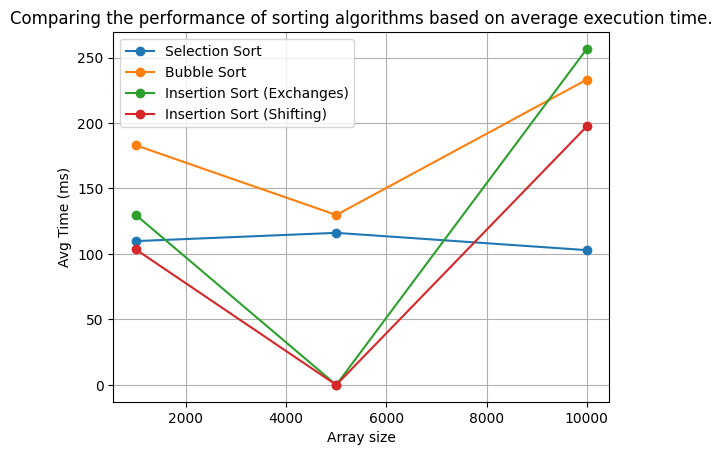

In [14]:
Algorithmes_names = data_frame['Algorithme'].unique()
for algo in Algorithmes_names:
    data_of_algo = data_frame[data_frame['Algorithme']==algo]
    Avg_times = data_of_algo['Avg Time (ms)'].values[:3]
    print(Avg_times)
    plt.plot(sizes ,Avg_times, label=algo, marker='o')
plt.title("Comparing the performance of sorting algorithms based on average execution time.")
plt.xlabel("Array size")
plt.ylabel("Avg Time (ms)")
plt.legend()
plt.grid(True)
plt.show